# Import Packages

In [1]:
import numpy as np
import pandas as pd
# import keras
import sklearn
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


# Miscellaneous

In [2]:
class Timer(object):
    """Create a Timer, Record the time gap"""
    def __init__(self):
        self.times=[]
        self.start()
        
    def start(self):
        # record the timestamp of start
        self.tik = time.time()
        
    def stop(self):
        # record the time gap from start to stop
        self.times.append(time.time() - self.tik)
        
    def avg(self):
        # 求平均值
        return sum(self.times) / len(self.times)
    
    def sum(self):
        # 求和
        return sum(self.times)
    
    def cumsum(self):
        # 求累积和
        return np.array(self.times).cumsum().tolist()
    
def Binarization(x):
    """Binarization of Grayscale Images"""
    if x == 0:
        return 0
    else:
        return 1

# Load dataset

In [3]:
# 数据集的相对地址
dataset_train_dir = './EMNIST_Byclass_Small/emnist_train.pkl'
dataset_test_dir = './EMNIST_Byclass_Small/emnist_test.pkl'

# 将数据集文件解压缩，读取为字典（按照dataset_description.txt文件所示）
dataset_train_dict = pickle.load(file=open(dataset_train_dir, 'rb'))
dataset_test_dict = pickle.load(file=open(dataset_test_dir, 'rb'))


# SVM

In [4]:
# 将训练集由形状(100000, 1, 28, 28)转为形状(100000, 28**2)
x_train = dataset_train_dict['data'].reshape(100000, 28**2).astype('float32')
y_train = dataset_train_dict['labels']

# 将测试集由形状(20000, 1, 28, 28)转为形状(20000, 28**2)
x_test = dataset_test_dict['data'].reshape(20000, 28**2).astype('float32')
y_test = dataset_test_dict['labels']

# 数据归一化
x_train = x_train / 255
x_test = x_test / 255

# 创建模型svm
# C：正则化参数
# kernel：SVM使用的内核函数，‘rbf’为径向基函数内核
# gamma：内核函数的核系数
# model = svm.SVC(C=100.0, kernel='rbf', gamma=0.03)
SVMmodel = svm.SVC(C=100.0, kernel='rbf', gamma='scale')

# 利用训练集拟合
timer = Timer()
SVMmodel.fit(x_train, y_train)
timer.stop()

Training Time:1226.932 s, Total Time:2312.898 s
accuracy: 0.81735
Confusion Matrix:
[[665   0   0 ...   0   0   0]
 [  0 896   2 ...   0   0   0]
 [  1   0 961 ...   1   0   7]
 ...
 [  0   1   1 ...  61   1   0]
 [  0   0   0 ...   0  15   0]
 [  0   0  19 ...   1   0  36]]
Classfication Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       976
           1       0.67      0.88      0.76      1023
           2       0.92      0.96      0.94      1003
           3       0.96      0.97      0.97      1035
           4       0.91      0.96      0.94       903
           5       0.88      0.89      0.88       928
           6       0.94      0.96      0.95       959
           7       0.97      0.98      0.98      1098
           8       0.95      0.97      0.96       941
           9       0.91      0.96      0.94       929
          10       0.87      0.89      0.88       170
          11       0.85      0.75      0.80       118

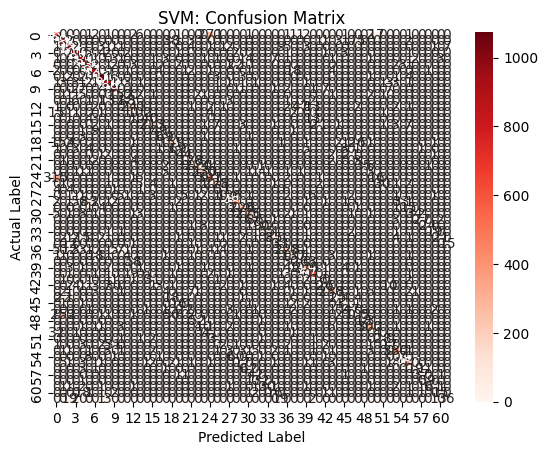

In [5]:

# 利用测试集预测
preds = [int(a) for a in SVMmodel.predict(x_test)]
timer.stop()
# 输出时间
print(f'Training Time:{timer.times[0]:.3f} s, Total Time:{timer.times[1]:.3f} s')
# 评估预测精度
print('accuracy:', accuracy_score(y_test, preds))
# 混淆矩阵
print("Confusion Matrix:")
cm = confusion_matrix(y_test, preds)
print(cm)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title('SVM: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
# f1-score,precision,recall
print('Classfication Report:')
print(classification_report(y_test, np.array(preds)))

# 决策树分类

In [6]:
# 将训练集由形状(100000, 28, 28)转为形状(100000, 28**2)
x_train = dataset_train_dict['data'].reshape(100000, 28**2).astype('float32')
y_train = dataset_train_dict['labels']
y_train = y_train.reshape(-1, 1)

# 将训练集由形状(20000, 28, 28)转为形状(20000, 28**2)
x_test = dataset_test_dict['data'].reshape(20000, 28**2).astype('float32')
y_test = dataset_test_dict['labels']
y_test = y_test.reshape(-1, 1)

# 建立Dataframe
train_data = np.hstack((x_train, y_train))
train_data = pd.DataFrame(train_data)
x_train = train_data.iloc[:, :-1]
print('x_train Shape:', x_train.shape)
y_train = train_data.iloc[:,-1]
print("y_train Shape: ", y_train.shape)

test_data = np.hstack((x_test, y_test))
test_data = pd.DataFrame(test_data)
x_test = test_data.iloc[:, :-1]
print('x_test Shape:', x_test.shape)
y_test = test_data.iloc[:,-1]
print("y_test Shape: ", y_test.shape)

x_train Shape: (100000, 784)
y_train Shape:  (100000,)
x_test Shape: (20000, 784)
y_test Shape:  (20000,)


Training Time:37.171 s, Total Time:37.213 s
Accuracy:60.12499999999999%


Text(345.72222222222223, 0.5, 'Actual Label')

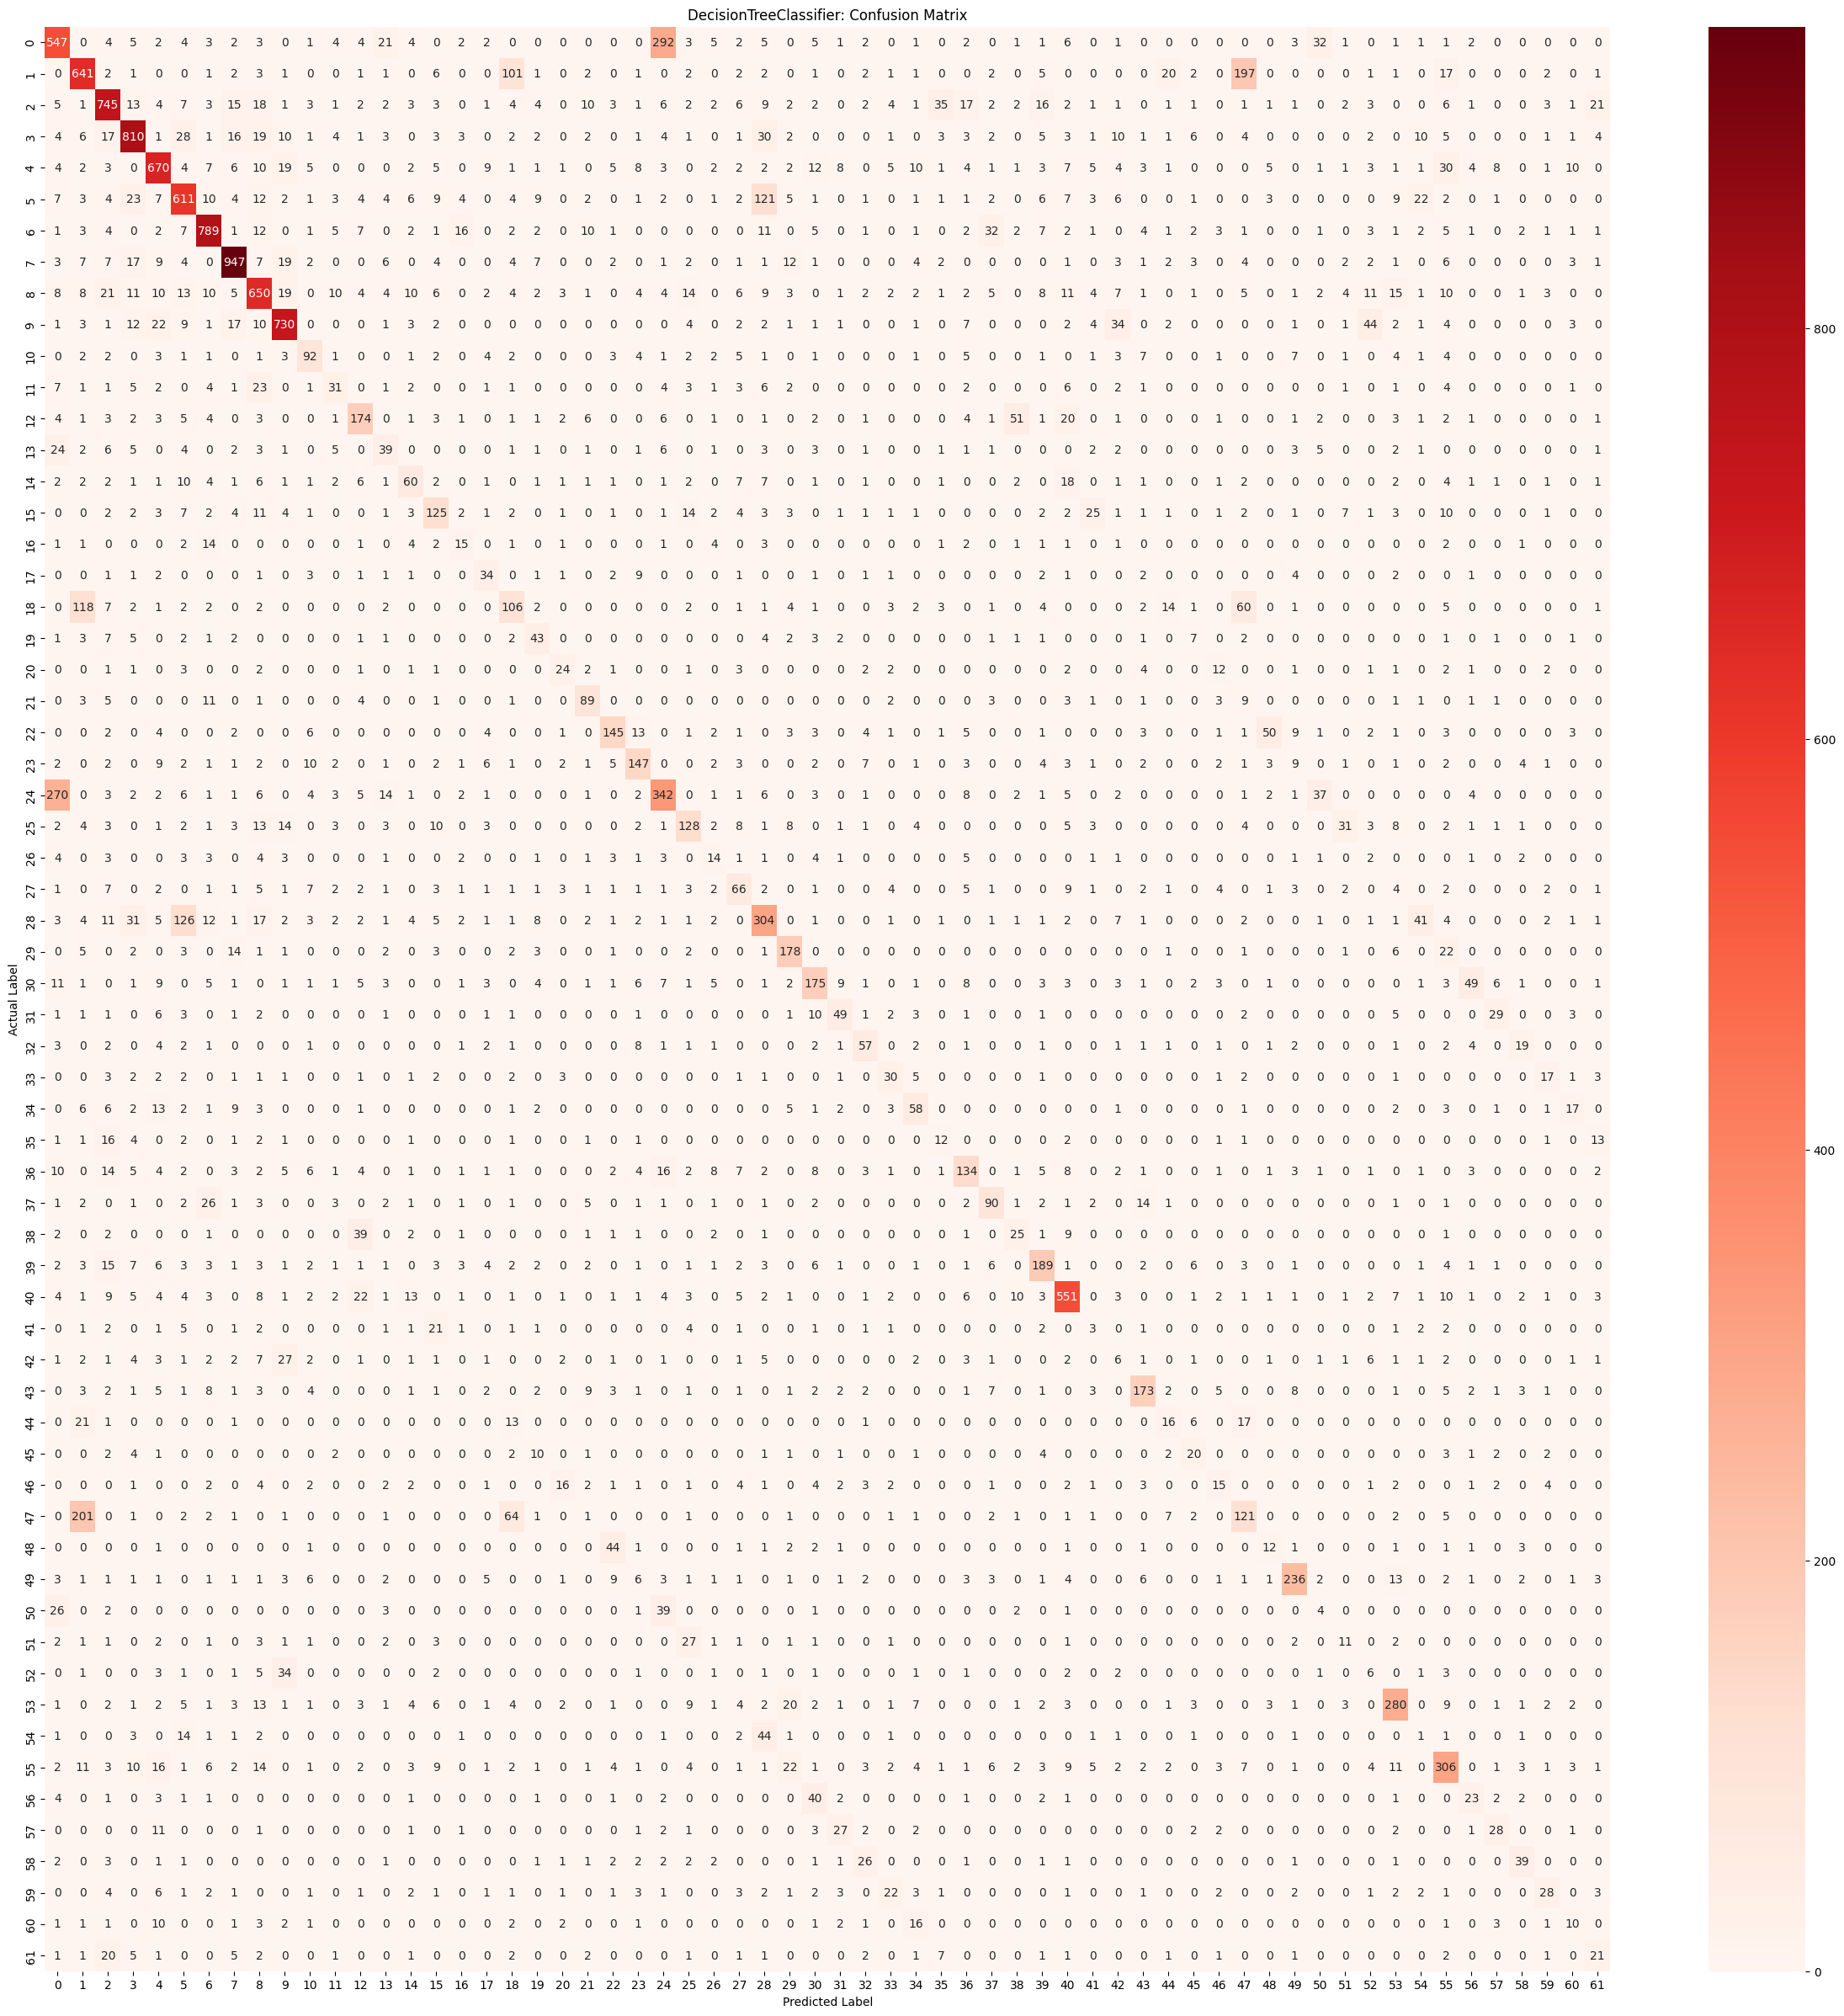

In [7]:
# Create Model of DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()
# Model fitting
timer = Timer()
DTmodel.fit(x_train, y_train)
timer.stop()
# Predict
prediction = DTmodel.predict(x_test)
timer.stop()
# 输出时间
print(f'Training Time:{timer.times[0]:.3f} s, Total Time:{timer.times[1]:.3f} s')
# Accuracy
acc = accuracy_score(y_test, prediction)
print(f"Accuracy:{acc * 100}%")
# Confusion_Matrix
plt.figure(figsize=(30, 30))
cm = confusion_matrix(y_test, prediction) # 混淆矩阵
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title('DecisionTreeClassifier: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# demo1
# 43.7s
# acc=60.205

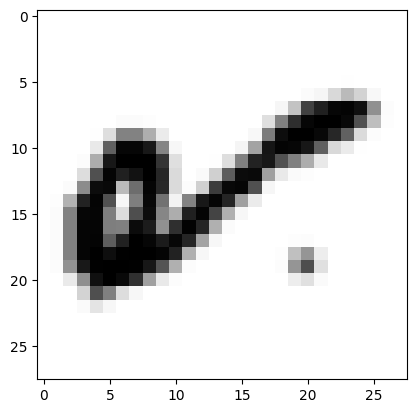

In [8]:
def show_image(index, dataset):
    """
    Show Images
    Input: index, dataset
    """   
    some_digit = dataset.iloc[index].values  # 按照索引取出图片
    some_digit_img = some_digit.reshape(28,28)  
    plt.imshow(some_digit_img,'binary')  # Show
    
show_image(999, x_train)

In [9]:
# 参数范围设置
params = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,12)]
              ,'min_samples_leaf':[*range(1,20,1)]
}
# 创建DecisionTreeClassifier模型
DTmodel = DecisionTreeClassifier()
# 进行网格搜索
timer = Timer()
clf = GridSearchCV(DTmodel, params, cv=3, scoring='accuracy',verbose=3, n_jobs=-1)
clf = clf.fit(x_train, y_train)
timer.stop()

Fitting 3 folds for each of 836 candidates, totalling 2508 fits
[CV 3/3] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=random;, score=0.099 total time=   3.2s
[CV 1/3] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=random;, score=0.097 total time=   3.3s
[CV 2/3] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=random;, score=0.096 total time=   3.3s
[CV 3/3] END criterion=gini, max_depth=1, min_samples_leaf=2, splitter=random;, score=0.098 total time=   3.2s
[CV 2/3] END criterion=gini, max_depth=1, min_samples_leaf=3, splitter=random;, score=0.098 total time=   3.2s
[CV 2/3] END criterion=gini, max_depth=1, min_samples_leaf=2, splitter=random;, score=0.094 total time=   3.3s
[CV 1/3] END criterion=gini, max_depth=1, min_samples_leaf=4, splitter=random;, score=0.095 total time=   3.0s
[CV 1/3] END criterion=gini, max_depth=1, min_samples_leaf=2, splitter=random;, score=0.092 total time=   3.3s
[CV 3/3] END criterion=gini, max_depth=1, min_sa

In [ ]:
# 输出寻参时间和最优参数
print(f"Params Search Time:{timer.times[0]:.3f} s")
print("Best Params:", clf.best_params_)

# resulet:
# {'criterion': 'entropy',
#  'max_depth': 9,
#  'min_samples_leaf': 2,
#  'splitter': 'best'}

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 8,
 'splitter': 'best'}

In [ ]:
# 按寻得的最优参数创建模型
model = DecisionTreeClassifier(
    criterion=clf.best_params_["criterion"], 
    max_depth=clf.best_params_["max_depth"],
    min_samples_leaf=clf.best_params_["min_samples+leaf"],
    splitter=clf.best_params_["splitter"])
timer = Timer()
model.fit(x_train,y_train)
timer.stop() 
prediction = model.predict(x_test)   
timer.stop()
# Time
print(f'Training Time:{timer.times[0]:.3f} s, Total Time:{timer.times[1]:.3f} s')
# Accuracy
print(f"Accuracy(Before Params Search):{acc * 100}%")
acc = accuracy_score(y_test,prediction)
print(f"Accuracy(After Params Search):{acc * 100}%")


0.5875

# 卷积神经网络